In [1]:
import pandas as pd
import numpy as np
import matplotlib
import editdistance

In [2]:
aspell_path = "results/aspell/all_phoneme_corrections.csv"
birkbeck_path = "results/birkbeck/all_phoneme_corrections.csv"
holbrook_path = "results/holbrook/all_phoneme_corrections.csv"
wiki_path = "results/wiki/all_phoneme_corrections.csv"
zeeko_path ="results/zeeko/all_phoneme_corrections.csv"

In [3]:
df_aspell = pd.read_csv(aspell_path)
df_birkbeck = pd.read_csv(birkbeck_path)
df_holbrook = pd.read_csv(holbrook_path)
df_wiki = pd.read_csv(wiki_path)
df_zeeko = pd.read_csv(zeeko_path)

In [4]:
df_aspell.shape

(515, 8)

In [5]:
df_birkbeck.shape

(33887, 8)

In [6]:
df_holbrook.shape

(1562, 8)

In [7]:
df_wiki.shape

(2230, 8)

In [8]:
df_zeeko.shape

(232, 8)

## Aspell Corrections Made with Lookup Vs Edit Distance

In [52]:
df_aspell.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
0,0.0,1.0,nevada,nevade,N AH V EY D,innovate,IH N AH V EY T,"['innovate', 'invade', 'nevada', 'nevada', 'pe...",0,1
1,1.0,1.0,presbyterian,presbyterian,P R EH S B IH T IH R IY AH N,presbyterian,P R EH S B IH T IH R IY AH N,"['presbyterian', 'presbyterian', 'presbyterian...",1,0
2,1.0,0.0,rsx,rsx,AA R EH S,rsx,AA R EH S,"['arts', 'arcs', 'dress', 'cress', 'tress', 'p...",1,0
3,0.0,1.0,stephen,steffen,S T EH F AH N,stephan,S T EH F AH N,"['stephan', 'stiffen', 'stefan', 'stiffener', ...",1,2
4,1.0,1.0,susan,susan,S UW Z AH N,susan,S UW Z AH N,"['susan', 'suzanne', 'susanne', 'season', 'loo...",1,0


In [10]:
df_aspell['exact_match'] = np.where(df_aspell['phoneme_rep']==df_aspell['suggested_phoneme'],1,0)

In [11]:
print("Total correct:",sum(df_aspell['correct']))
print("Correct in candidates:",sum(df_aspell['in_candidates']))
df_aspell_filtered = df_aspell[df_aspell['in_candidates'] == 1]
print("Total exact match:",sum(df_aspell_filtered['exact_match']))

Total correct: 239.0
Correct in candidates: 327.0
Total exact match: 151


## Birkbeck Corrections Made with Lookup Vs Edit Distance

In [12]:
df_birkbeck.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates
0,0.0,0.0,obvious,ab,EY B IY,abbey,AE B IY,"['abbey', 'abby', 'abbe', 'amy', 'aimee', 'ach..."
1,0.0,0.0,america,ameraca,AE M ER AA K AH,asmara,AE Z M AA R AH,"['asmara', 'monica', 'admiral', 'marcus', 'mar..."
2,0.0,0.0,america,amercia,AH M ER SH AH,inertia,IH N ER SH AH,"['inertia', 'alicia', 'acacia', 'amoeba', 'smy..."
3,0.0,0.0,american,ameracan,AE M ER AA K AH N,moccasin,M AA K AH S IH N,"['moccasin', 'moroccan', 'hammerlock', 'tamari..."
4,0.0,0.0,april,apirl,AE P ER L,apple,AE P AH L,"['apple', 'appel', 'opal', 'opel', 'appeal', '..."


In [13]:
df_birkbeck['exact_match'] = np.where(df_birkbeck['phoneme_rep']==df_birkbeck['suggested_phoneme'],1,0)

In [14]:
print("Total correct:",sum(df_birkbeck['correct']))
print("Correct in candidates:",sum(df_birkbeck['in_candidates']))
df_birkbeck_filtered = df_birkbeck[df_birkbeck['in_candidates'] == 1]
print("Total exact match:",sum(df_birkbeck_filtered['exact_match']))

Total correct: 10811.0
Correct in candidates: 15961.0
Total exact match: 6006


## Holbrook Corrections Made with Lookup Vs Edit Distance

In [15]:
df_holbrook.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates
0,0.0,0.0,adam's,adam,AE D AH M,adam,AE D AH M,['adam']
1,0.0,0.0,after,artair,AA R T EH R,NaN,NaN,[]
2,0.0,0.0,america,american,AH M EH R IH K AH N,american,AH M EH R IH K AH N,['american']
3,0.0,0.0,and,ane,EY N,ane,EY N,['ane']
4,1.0,1.0,apprenticeship,apprentiship,AH P R EH N T IH SH IH P,apprenticeship,AH P R EH N T AH S SH IH P,['apprenticeship']


In [16]:
df_holbrook['exact_match'] = np.where(df_holbrook['phoneme_rep']==df_holbrook['suggested_phoneme'],1,0)

In [17]:
print("Total correct:",sum(df_holbrook['correct']))
print("Correct in candidates:",sum(df_holbrook['in_candidates']))
df_holbrook_filtered = df_holbrook[df_holbrook['in_candidates'] == 1]
print("Total exact match:",sum(df_holbrook_filtered['exact_match']))

Total correct: 370.0
Correct in candidates: 399.0
Total exact match: 313


## Wiki Corrections Made with Lookup Vs Edit Distance

In [18]:
df_wiki.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates
0,0.0,0.0,apennines,apenines,AE P AH N IY N Z,convenes,K AH N V IY N Z,"['convenes', 'canteens', 'captions', 'chaplain..."
1,0.0,0.0,apennines,appenines,AE P AH N IY N Z,convenes,K AH N V IY N Z,"['convenes', 'canteens', 'captions', 'chaplain..."
2,0.0,1.0,athenian,athenean,AE TH AH N IY AH N,athenaeum,AE TH AH N IY AH M,"['athenaeum', 'athenian', 'kantian', 'unbeaten..."
3,1.0,1.0,athenians,atheneans,AE TH AH N IY AH N Z,athenians,AE TH IY N IY AH N Z,"['athenians', 'pathogens', 'phoenicians', 'ath..."
4,0.0,0.0,bernoulli,bernouilli,B ER N UW IY,burnley,B ER N L IY,"['burnley', 'bungee', 'bandy', 'banshee', 'ban..."


In [19]:
df_wiki['exact_match'] = np.where(df_wiki['phoneme_rep']==df_wiki['suggested_phoneme'],1,0)

In [20]:
print("Total correct:",sum(df_wiki['correct']))
print("Correct in candidates:",sum(df_wiki['in_candidates']))
df_wiki_filtered = df_wiki[df_wiki['in_candidates'] == 1]
print("Total exact match:",sum(df_wiki_filtered['exact_match']))

Total correct: 1320.0
Correct in candidates: 1591.0
Total exact match: 790


## Zeeko Corrections Made with Lookup Vs Edit Distance

In [21]:
df_zeeko.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates
0,0.0,1.0,actually,achuly,AE CH UW L IY,virtually,V ER CH UW L IY,"['virtually', 'actually', 'truly', 'cruelly', ..."
1,0.0,1.0,actually,acualy,AE K Y UW W AH L IY,annually,AE N Y UW AH L IY,"['annually', 'actually', 'accurately']"
2,1.0,1.0,address,addres,AE D R EY Z,address,AE D R EH S,"['address', 'address', 'padres', 'andres', 'ad..."
3,0.0,0.0,address,adres,EY D R EY Z,adas,EY D AH Z,"['adas', 'strays', 'iras', 'prayers', 'apprais..."
4,1.0,1.0,address,adress,AH D R EH S,address,AE D R EH S,"['address', 'address', 'oppress', 'attests', '..."


In [22]:
df_zeeko['exact_match'] = np.where(df_zeeko['phoneme_rep']==df_zeeko['suggested_phoneme'],1,0)

In [23]:
print("Total correct:",sum(df_zeeko['correct']))
print("Correct in candidates:",sum(df_zeeko['in_candidates']))
df_zeeko_filtered = df_zeeko[df_zeeko['in_candidates'] == 1]
print("Total exact match:",sum(df_zeeko_filtered['exact_match']))

Total correct: 119.0
Correct in candidates: 166.0
Total exact match: 69


In [24]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [25]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


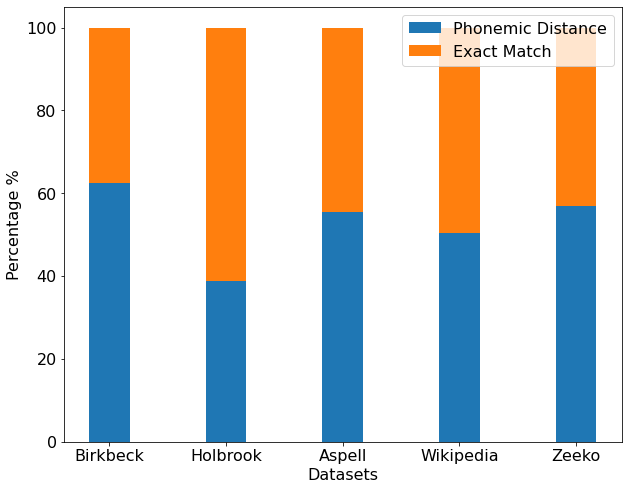

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

# plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

labels = ['Birkbeck', 'Holbrook', 'Aspell', 'Wikipedia', 'Zeeko']
phonemic_distance = [62.37, 38.88, 55.59, 50.35, 56.96]
exact_match = [37.63, 61.12, 44.41, 49.65, 43.04]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(labels, phonemic_distance, width, label='Phonemic Distance')
ax.bar(labels, exact_match, width, bottom=phonemic_distance,
       label='Exact Match')

ax.set_xlabel('Datasets')
ax.set_ylabel('Percentage %')
ax.legend()

plt.show()

In [27]:
# Find examples of phoneme correction where character edit distance is greater than 2 and not exact match

In [28]:
import editdistance

def edit(misspelling, correct):
    return editdistance.eval(str(misspelling), str(correct))

### Aspell Greater than 2 Distance correction 

In [29]:
df_aspell['edit_distance'] = df_aspell.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)

In [30]:
df_aspell_edit = df_aspell[(df_aspell['edit_distance'] > 2) & (df_aspell['exact_match'] == 0) & (df_aspell['in_candidates'] == 1)]
df_aspell_edit = df_aspell_edit.sort_values(by=['edit_distance'], ascending=False)

In [53]:
df_aspell_edit.head(20)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
239,0.0,1.0,hyphen,hifine,HH IH F AY N,huffine,HH AH F AY N,"['refine', 'define', 'refiner', 'refine', 'hyp...",0,5
58,1.0,1.0,bureau,beauro,B OW UH R OW,bureau,B Y UH R OW,"['bureau', 'bozo', 'bono', 'barrow', 'biro', '...",0,4
59,1.0,1.0,bureaucracy,beaurocracy,B OW R AA K R AH S IY,bureaucracy,B Y UH R AA K R AH S IY,['bureaucracy'],0,4
486,1.0,1.0,unconscious,unconscience,AH N K AA N SH AH N S,unconscious,AH N K AA N SH AH S,"['unconscious', 'unconsciousness', 'conscience']",0,4
139,0.0,1.0,discussion,disssicion,D IH S IH SH AH N,decision,D IH S IH ZH AH N,"['decision', 'desertion', 'rescission', 'reces...",0,4
238,0.0,1.0,hyphen,hifin,HH IH F IH N,herein,HH IH R IH N,"['herein', 'tiffin', 'huffing', 'griffin', 'hy...",0,4
241,1.0,1.0,hyphen,hyfin,HH AY F IH N,hyphen,HH AY F AH N,"['hyphen', 'hyping', 'huffing', 'hiking', 'hys...",0,3
464,1.0,1.0,technically,techniquely,T EH K N IY K L IY,technically,T EH K N IH K L IY,"['technically', 'technically', 'techniques', '...",0,3
395,1.0,1.0,psychologist,psycolagest,S AY K AH L IH JH AH S T,psychologist,S AY K AA L AH JH AH S T,"['psychologist', 'cyclist']",0,3
364,1.0,1.0,permissive,permmasivie,P ER M AH S IH V IY,permissive,P ER M IH S IH V,['permissive'],0,3


In [32]:
sum(df_aspell['in_candidates'])

327.0

In [33]:
sum(df_aspell_edit['in_candidates'])

28.0

### Birkbeck Greater than 2 Distance correction 

In [34]:
df_birkbeck['edit_distance'] = df_birkbeck.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)

In [35]:
df_birkbeck_edit = df_birkbeck[(df_birkbeck['edit_distance'] > 2) & (df_birkbeck['exact_match'] == 0) & (df_birkbeck['in_candidates'] == 1)]
df_birkbeck_edit = df_birkbeck_edit.sort_values(by=['edit_distance'], ascending=False)

In [62]:
df_birkbeck_edit.to_csv('birkbeck_edit.csv')

In [37]:
sum(df_birkbeck['in_candidates'])

15961.0

In [38]:
sum(df_birkbeck_edit['in_candidates'])

3030.0

### Holbrook Greater than 2 Distance correction 

In [39]:
df_holbrook['edit_distance'] = df_holbrook.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)

In [40]:
df_holbrook_edit = df_holbrook[(df_holbrook['edit_distance'] > 2) & (df_holbrook['exact_match'] == 0) & (df_holbrook['in_candidates'] == 1)]
df_holbrook_edit = df_holbrook_edit.sort_values(by=['edit_distance'], ascending=False)

In [41]:
sum(df_holbrook_edit['in_candidates'])

14.0

In [56]:
df_holbrook_edit.head(20)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
751,1.0,1.0,hydraulic,high_drollit,HH AY D R AO L IH T,hydraulic,HH AY D R AO L IH K,['hydraulic'],0,7
89,1.0,1.0,porky,paulkey,P AO L K IY,porky,P AO R K IY,['porky'],0,4
741,1.0,1.0,horrified,horrieyfide,HH AO R IY AH F AY D,horrified,HH AO R AH F AY D,['horrified'],0,4
1406,1.0,1.0,unhealthy,on_hethy,AA N HH IY TH IY,unhealthy,AH N HH EH L TH IY,['unhealthy'],0,4
1560,1.0,1.0,yourself,your_sleve,Y AO R S L IY V,yourself,Y AO R S EH L F,['yourself'],0,4
18,1.0,1.0,cheerio,cheere_ho,CH IH R IY HH OW,cheerio,CH IH R IY OW,['cheerio'],0,3
103,1.0,1.0,switzerland,swizaland,S W IH Z AH L AH N D,switzerland,S W IH T S ER L AH N D,['switzerland'],0,3
410,1.0,1.0,council,cousall,K AW S AH L,council,K AW N S AH L,"['council', 'counsel']",0,3
420,1.0,1.0,crept,creeped,K R IY P T,crept,K R EH P T,['crept'],0,3
459,1.0,1.0,destroyed,distrod,D IH S T R AA D,destroyed,D IH S T R OY D,['destroyed'],0,3


### Wiki Greater than 2 Distance correction 

In [43]:
df_wiki['edit_distance'] = df_wiki.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)

In [44]:
df_wiki_edit = df_wiki[(df_wiki['edit_distance'] > 2) & (df_wiki['exact_match'] == 0) & (df_wiki['in_candidates'] == 1)]
df_wiki_edit = df_wiki_edit.sort_values(by=['edit_distance'], ascending=False)

In [45]:
sum(df_wiki_edit['in_candidates'])

19.0

In [46]:
df_wiki_edit.head(10)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
2189,0.0,1.0,which,hwihc,HH W IH K,whig,HH W IH G,"['whig', 'whack', 'whip', 'whiff', 'whit', 'wh...",0,4
1469,0.0,1.0,purpose,perphas,P ER F AH Z,pariahs,P ER AY AH Z,"['pariahs', 'purpose', 'surface', 'purchase', ...",0,4
1900,1.0,1.0,subpoena,sepina,S EH P IY N AH,subpoena,S AH P IY N AH,"['subpoena', 'sabina', 'serena', 'salina', 'se...",0,4
382,1.0,1.0,bureaucracy,beaurocracy,B OW R AA K R AH S IY,bureaucracy,B Y UH R AA K R AH S IY,['bureaucracy'],0,4
1818,0.0,1.0,shouldn't,shoudln,SH AA UW D AH N,sheldon,SH EH L D AH N,"['sheldon', 'shotgun', 'sharpen', 'harden', 'p...",0,4
2129,1.0,1.0,unwieldy,unweildly,AH N W AY L D L IY,unwieldy,AH N W IY L D IY,"['unwieldy', 'unwisely', 'wildly']",0,3
1751,1.0,1.0,restaurants,resteraunts,R EH S T ER AO N T S,restaurants,R EH S T ER AA N T S,"['restaurants', 'restaurants', 'restaurant']",0,3
1748,1.0,1.0,restaurant,resteraunt,R EH S T ER AO N T,restaurant,R EH S T ER AA N T,"['restaurant', 'restaurant', 'restaurateur', '...",0,3
1592,0.0,1.0,procedure,procedger,P R AA S EH JH ER,processor,P R AA S EH S ER,"['processor', 'procedure', 'procedure', 'proce...",0,3
1554,0.0,1.0,prominently,prominately,P R AA M AH N AH T L IY,premonitory,P R AH M AH N AH T ER IY,"['premonitory', 'predominate', 'prominently', ...",0,3


### Zeeko Greater than 2 Distance correction 

In [47]:
df_zeeko['edit_distance'] = df_zeeko.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)

In [48]:
df_zeeko_edit = df_zeeko[(df_zeeko['edit_distance'] > 2) & (df_zeeko['exact_match'] == 0) & (df_zeeko['in_candidates'] == 1)]
df_zeeko_edit = df_zeeko_edit.sort_values(by=['edit_distance'], ascending=False)

In [49]:
sum(df_zeeko_edit['in_candidates'])

6.0

In [50]:
df_zeeko_edit.head(10)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
191,1.0,1.0,situation,sichweshen,S IH CH W EH SH AH N,situation,S IH CH UW EY SH AH N,"['situation', 'secession']",0,7
37,0.0,1.0,careful,kafull,K AE F AH L,cackle,K AE K AH L,"['cackle', 'castle', 'kassel', 'cassel', 'baff...",0,4
0,0.0,1.0,actually,achuly,AE CH UW L IY,virtually,V ER CH UW L IY,"['virtually', 'actually', 'truly', 'cruelly', ...",0,3
40,0.0,1.0,cause,cuz,K AH Z,cuss,K AH S,"['cuss', 'cayes', 'cars', 'cause', 'coz', 'key...",0,3
85,1.0,1.0,footprint,futprnt,F AH T P R N T,footprint,F UH T P R IH N T,['footprint'],0,3
159,1.0,1.0,online,onllan,AO N L AH N,online,AO N L AY N,"['online', 'arlen', 'offline', 'onion', 'ensig...",0,3
